<a href="https://colab.research.google.com/github/Teegee2000/cardiovascular-disease-predictions-leveraging-supervised-and-ensemble-machine-learning-models/blob/main/cardiovascular_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

## 19-02-2025
import pandas as pd ## it allows loading of dataset
import numpy as np ## incase i need to work with array
import matplotlib.pyplot as plt ## for visualization
import seaborn as sns ## for visualization ## built from matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## for the primary data from mendeley
df_file_path='/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv'

df=pd.read_csv(df_file_path)## loading the dataset


In [4]:
df.head(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
df.shape

(1000, 14)

## data cleaning

In [6]:
 df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [8]:
df.isna().sum() # finding any missing value

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


## visualization (EDA)

In [14]:
 age_count=df['age'].value_counts()
 print(age_count)

age
20    28
58    23
24    22
76    22
73    21
      ..
41    11
75    11
35    11
65    11
49    10
Name: count, Length: 61, dtype: int64


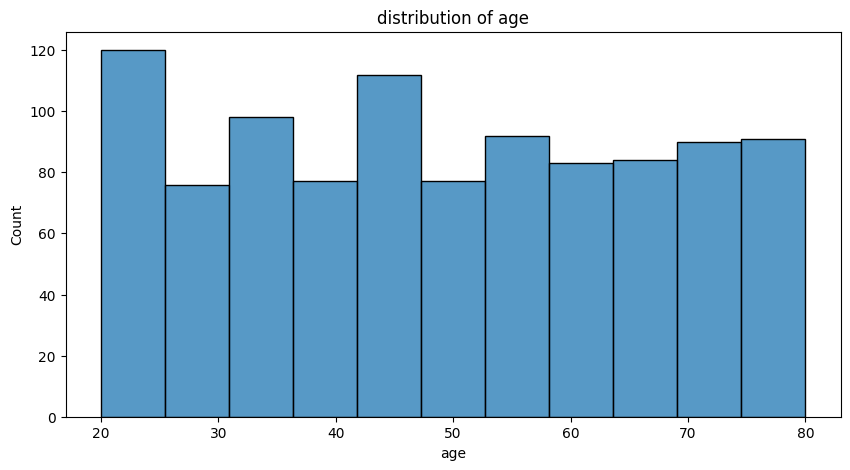

In [10]:
# distribution of age
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.title('distribution of age')
plt.show()

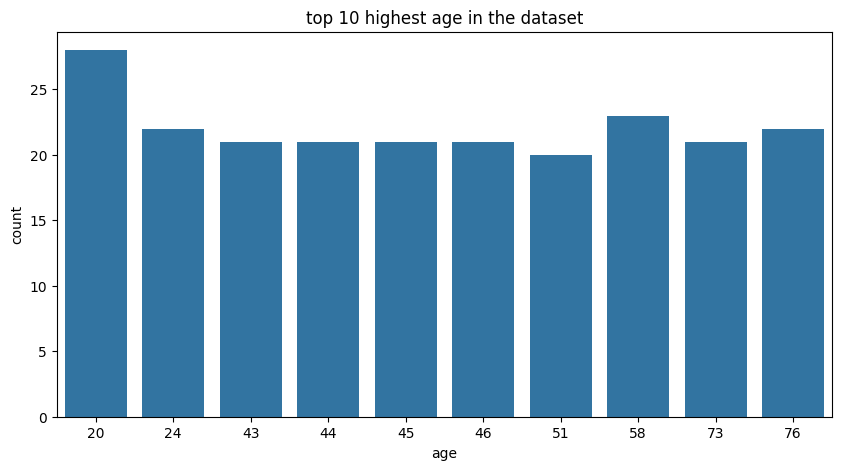

In [13]:
## top 10 highest age in the dataset
plt.figure(figsize=(10,5))
sns.barplot(x=df['age'].value_counts()[:10].index,y=df['age'].value_counts()[:10].values)
plt.title('top 10 highest age in the dataset')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

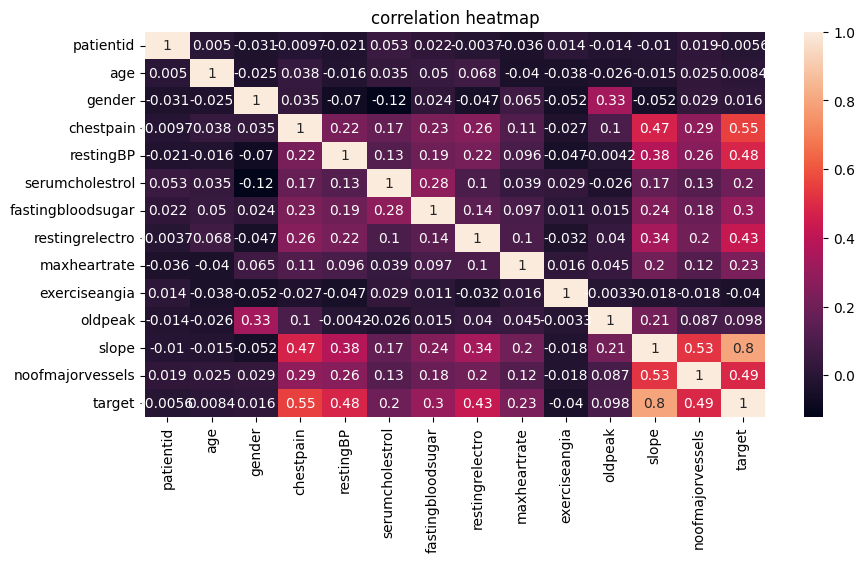

In [15]:
## correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation heatmap')
plt.show()

In [17]:
## checking chest pain columns
chest_pain_count=df['chestpain'].value_counts()
print(chest_pain_count)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


<ipython-input-20-f4a6c2bb62fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['chestpain'].value_counts().index,y=df['chestpain'].value_counts().values,palette=colors)


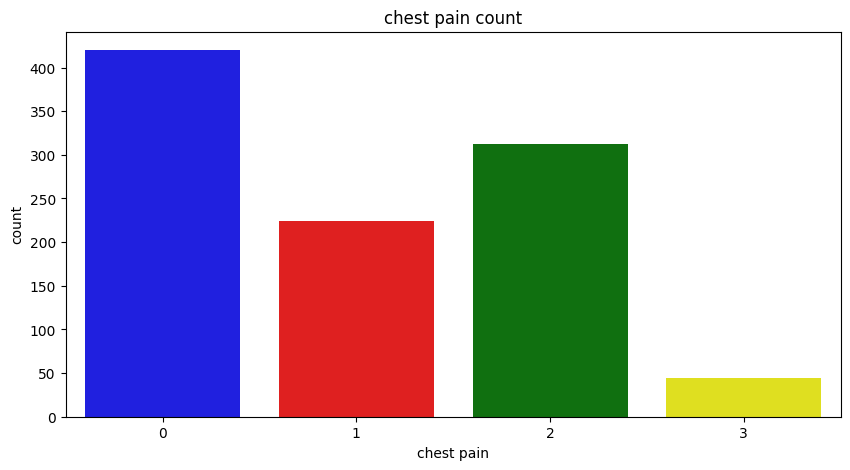

In [20]:
plt.figure(figsize=(10,5))
colors=['blue','red','green','yellow']
sns.barplot(x=df['chestpain'].value_counts().index,y=df['chestpain'].value_counts().values,palette=colors)
plt.title('chest pain count')
plt.xlabel('chest pain')
plt.ylabel('count')
plt.show()

In [22]:
from __future__ import generator_stop
## count of male and female
generator_stop=df['gender'].value_counts()
print("\n total number of male and female")
print(f'male:{generator_stop[1]}')
print(f'female:{generator_stop[0]}')


 total number of male and female
male:765
female:235


<ipython-input-23-59810c45b33b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette=colors)


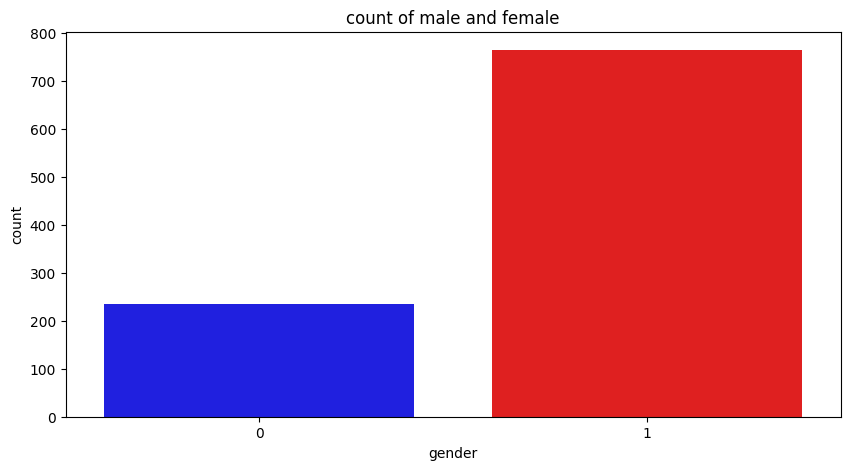

In [23]:
plt.figure(figsize=(10,5))
colors=['blue','red']
sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette=colors)
plt.title('count of male and female')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

target
1    580
0    420
Name: count, dtype: int64


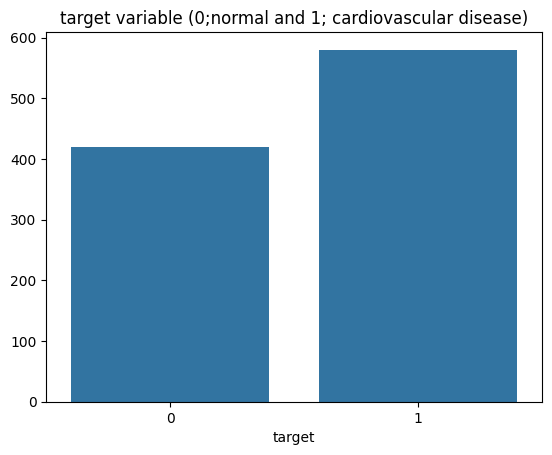

In [25]:
## target variable
target_count=df['target'].value_counts()
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts().values)
plt.title('target variable (0;normal and 1; cardiovascular disease)')
print(target_count)
